In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from scipy import stats

In [2]:
file_path = "resources_2/general_dataset_v5.csv"
temp_anom_df = pd.read_csv(file_path)
temp_anom_df.head()

,country_code,country_name,year,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,extreme_temperatures_count,floods_count,storms_count,wildfires_count,total_count_disasters,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,agriculture_value_added_constants,agriculture_value_added_percentage_gdp
0,AFG,Afghanistan,1988,2856896,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.116008,11618008,0.988,NaN,NaN
1,AFG,Afghanistan,1990,2603238,NaN,0.0,144.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,4.476954,12412311,0.847,NaN,NaN
2,AFG,Afghanistan,1991,2427366,NaN,0.0,80.0,1193.0,0.0,0.0,...,1.0,3.0,0.0,0.0,4.0,6.900124,13299016,-0.058,NaN,NaN
3,AFG,Afghanistan,1992,1379462,NaN,0.0,0.0,600.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,8.546107,14485543,-0.214,NaN,NaN
4,AFG,Afghanistan,1993,1333055,NaN,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,1.0,0.0,1.0,8.790897,15816601,0.292,NaN,NaN


In [5]:
disasters_df= temp_anom_df[(temp_anom_df['country_code'] == 'CHN')]
disasters_df.head()

,country_code,country_name,year,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,extreme_temperatures_count,floods_count,storms_count,wildfires_count,total_count_disasters,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,agriculture_value_added_constants,agriculture_value_added_percentage_gdp
530,CHN,China,1988,2425893553,12.107661,1400.0,0.0,1243.0,335.0,0.0,...,0.0,8.0,4.0,0.0,13.0,1.610071,1101630000,0.397,3.195560e+11,25.237687
531,CHN,China,1989,2463654367,8.602465,0.0,0.0,2000.0,1115.0,0.0,...,0.0,1.0,7.0,0.0,8.0,1.533170,1118650000,0.422,3.293830e+11,24.611552
532,CHN,China,1990,2484854820,5.711224,0.0,0.0,495.0,629.0,0.0,...,0.0,3.0,11.0,0.0,14.0,1.467303,1135185000,0.844,3.535190e+11,26.584308
533,CHN,China,1991,2606096182,6.714537,2000.0,0.0,1861.0,255.0,0.0,...,0.0,3.0,5.0,0.0,9.0,1.364434,1150780000,0.510,3.618390e+11,24.034067
534,CHN,China,1992,2730787587,8.190323,0.0,0.0,540.0,860.0,0.0,...,0.0,6.0,8.0,0.0,16.0,1.225536,1164970000,0.112,3.786680e+11,21.328861


In [6]:
disasters_df= disasters_df.drop(['country_code','country_name'], axis=1)
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 530 to 562
Data columns (total 38 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   year                                                          33 non-null     int64  
 1   annual_co2_emissions_tons                                     33 non-null     int64  
 2   inflation_inflation_gdp_deflation                             33 non-null     float64
 3   deaths_from_drought                                           33 non-null     float64
 4   deaths_from_extreme_temps                                     33 non-null     float64
 5   deaths_from_floods                                            33 non-null     float64
 6   deaths_from_storms                                            33 non-null     float64
 7   deaths_from_wildfires                                         33 non-n

In [8]:
disasters_df.set_index('year',inplace = True)
disasters_df.head()

,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,people_affected_by_drought_per_100k,people_affected_by_extreme_temperatures_per_100k,people_affected_by_floods_per_100k,...,extreme_temperatures_count,floods_count,storms_count,wildfires_count,total_count_disasters,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,agriculture_value_added_constants,agriculture_value_added_percentage_gdp
year,,,,,,,,,,,,,,,,,,,,,
1988,2425893553,12.107661,1400.0,0.0,1243.0,335.0,0.0,4306.844070,0.0,2243.514181,...,0.0,8.0,4.0,0.0,13.0,1.610071,1101630000,0.397,3.195560e+11,25.237687
1989,2463654367,8.602465,0.0,0.0,2000.0,1115.0,0.0,0.000000,0.0,8632.917200,...,0.0,1.0,7.0,0.0,8.0,1.533170,1118650000,0.422,3.293830e+11,24.611552
1990,2484854820,5.711224,0.0,0.0,495.0,629.0,0.0,0.000000,0.0,3568.746040,...,0.0,3.0,11.0,0.0,14.0,1.467303,1135185000,0.844,3.535190e+11,26.584308
1991,2606096182,6.714537,2000.0,0.0,1861.0,255.0,0.0,419.147663,0.0,17268.883722,...,0.0,3.0,5.0,0.0,9.0,1.364434,1150780000,0.510,3.618390e+11,24.034067
1992,2730787587,8.190323,0.0,0.0,540.0,860.0,0.0,994.438569,0.0,17.402675,...,0.0,6.0,8.0,0.0,16.0,1.225536,1164970000,0.112,3.786680e+11,21.328861


AxesSubplot(0.125,0.125;0.775x0.755)


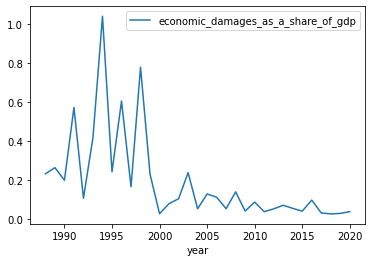

In [9]:
axis = disasters_df.plot.line(y='economic_damages_as_a_share_of_gdp',rot=0)
print(axis)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


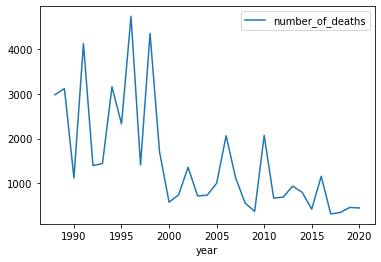

In [10]:
axis = disasters_df.plot.line(y='number_of_deaths',rot=0)
print(axis)
plt.show()

In [11]:
disasters_df.columns.tolist()

['annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thousands',
 'people_affected_per_100k',
 'number_of_deaths',
 'drought_count',
 'extreme_temperatures_count',
 

In [12]:
disasters_df = disasters_df.drop([
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
 'drought_count',
 'extreme_temperatures_count',
 'floods_count',
 'storms_count',
 'wildfires_count',
 'population_population_growth_annual_percentage',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp'], axis=1)
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1988 to 2020
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   annual_co2_emissions_tons               33 non-null     int64  
 1   economic_damages_as_a_share_of_gdp      33 non-null     float64
 2   people_affected_per_100k                33 non-null     float64
 3   number_of_deaths                        33 non-null     float64
 4   total_count_disasters                   33 non-null     float64
 5   population_population_total             33 non-null     int64  
 6   temperature_change_temp_change_celsius  33 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.1 KB


In [15]:
disasters_df= disasters_df.sort_values('economic_damages_as_a_share_of_gdp',ascending=False)
disasters_df.head(5)

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1994,3100002045,1.038466,17888.733982,3154.0,14.0,1191835000,0.717
1998,3360455433,0.777757,17707.900623,4346.0,10.0,1241935000,1.246
1996,3503233703,0.604995,13206.875180,4728.0,12.0,1217550000,0.195
1991,2606096182,0.571885,17967.949093,4116.0,9.0,1150780000,0.510
1993,2921650956,0.419158,697.689631,1445.0,15.0,1178440000,0.265


In [16]:
disasters_df= disasters_df.sort_values('number_of_deaths',ascending=False)
disasters_df.head(5)

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1996,3503233703,0.604995,13206.875180,4728.0,12.0,1217550000,0.195
1998,3360455433,0.777757,17707.900623,4346.0,10.0,1241935000,1.246
1991,2606096182,0.571885,17967.949093,4116.0,9.0,1150780000,0.510
1994,3100002045,1.038466,17888.733982,3154.0,14.0,1191835000,0.717
1989,2463654367,0.264113,11913.425736,3115.0,8.0,1118650000,0.422


In [18]:
disasters_df= disasters_df.sort_values('people_affected_per_100k',ascending=False)
disasters_df.head(5)

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
2008,7496832207,0.140070,2.110093e+07,563.0,19.0,1324655000,1.063
2016,9720444086,0.097961,1.605079e+06,1161.0,27.0,1387790000,1.305
2011,9528555734,0.038740,2.897185e+05,674.0,11.0,1345035000,0.764
1997,3510169286,0.166451,3.012481e+04,1412.0,15.0,1230075000,0.717
2012,9775621803,0.053346,2.334149e+04,697.0,21.0,1354190000,0.596


In [21]:
disasters_df= disasters_df.sort_values('total_count_disasters',ascending=False)
disasters_df.head(5)

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
2013,9952743755,0.071537,1716.315226,942.0,31.0,1363240000,1.050
2014,9985583382,0.055884,4432.353770,802.0,31.0,1371860000,1.044
2015,9848419740,0.041675,247.783698,429.0,30.0,1379860000,1.279
2006,6488803816,0.113153,6562.530783,2064.0,29.0,1311020000,1.205
2005,5876555340,0.129297,6238.821410,1004.0,28.0,1303720000,1.022


In [22]:
disasters_df= disasters_df.sort_values('annual_co2_emissions_tons',ascending=False)
disasters_df.head(5)

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
2020,10667887453,0.039183,1035.392819,455.0,10.0,1411100000,1.636
2019,10489988555,0.030014,351.531317,466.0,11.0,1407745000,1.413
2018,10289989525,0.027430,581.662987,354.0,20.0,1402760000,1.350
2014,9985583382,0.055884,4432.353770,802.0,31.0,1371860000,1.044
2013,9952743755,0.071537,1716.315226,942.0,31.0,1363240000,1.050


In [23]:
disasters_df.describe()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
count,3.300000e+01,33.000000,3.300000e+01,33.000000,33.000000,3.300000e+01,33.000000
mean,6.058611e+09,0.194432,7.049445e+05,1500.303030,17.787879,1.282850e+09,0.933879
std,3.099619e+09,0.236345,3.672169e+06,1222.328196,6.748878,9.034375e+07,0.408209
min,2.425894e+09,0.027430,2.477837e+02,322.000000,8.000000,1.101630e+09,0.112000
25%,3.357909e+09,0.053346,2.352285e+03,674.000000,13.000000,1.217550e+09,0.596000
50%,5.223755e+09,0.104668,8.918435e+03,1124.000000,17.000000,1.296075e+09,1.022000
75%,9.720444e+09,0.232596,1.770790e+04,2064.000000,21.000000,1.354190e+09,1.246000
max,1.066789e+10,1.038466,2.110093e+07,4728.000000,31.000000,1.411100e+09,1.636000


1. Total economic damages as a share of GDP Analysis

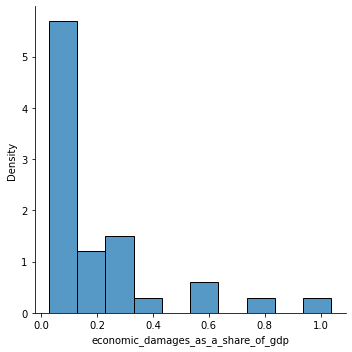

In [25]:
# Extract feature we're interested in
data_1 = disasters_df['economic_damages_as_a_share_of_gdp']

# Generate histogram/distribution plot
sb.displot(data_1, stat="density")

plt.show()

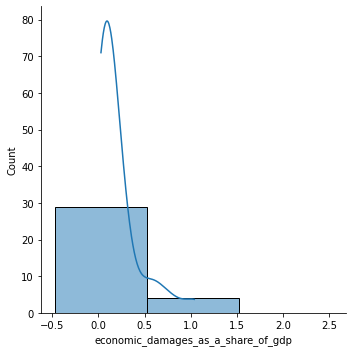

In [26]:
sb.displot(data_1, discrete = True, kde = True)
plt.show()

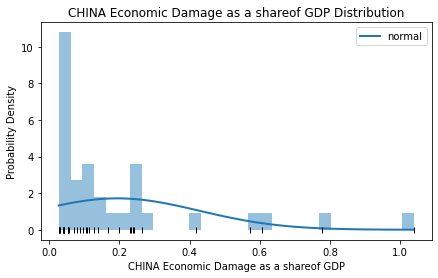

In [27]:
# Histogram
# ==============================================================================
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data_1)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data_1), max(data_1), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data_1, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_1, np.full_like(data_1, -0.01), '|k', markeredgewidth=1)
ax.set_title('CHINA Economic Damage as a shareof GDP Distribution')
ax.set_xlabel('CHINA Economic Damage as a shareof GDP')
ax.set_ylabel('Probability Density')
ax.legend();

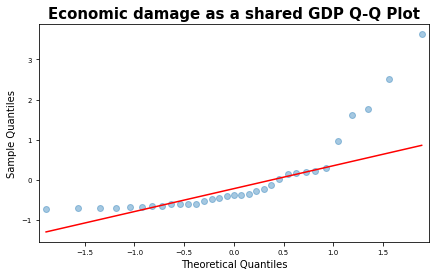

In [28]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data_1,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Economic damage as a shared GDP Q-Q Plot', fontsize = 15,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f63e661f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1f63e6679c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f63e661a08>],
 'medians': [<matplotlib.lines.Line2D at 0x1f63e66f1c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f63e66f648>],
 'means': []}

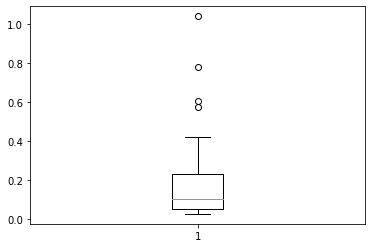

In [29]:
plt.boxplot(data_1)

In [30]:
print('Kursotis:', stats.kurtosis(data_1))
print('Skewness:', stats.skew(data_1))

Kursotis: 4.0454058251699925
Skewness: 2.123305415346158


In [31]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(data_1)
shapiro_test

ShapiroResult(statistic=0.6977896690368652, pvalue=6.045477221050533e-07)

In [32]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(data_1)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 27.439055363923913, p-value = 1.100740214759706e-06


2. Number of Deaths

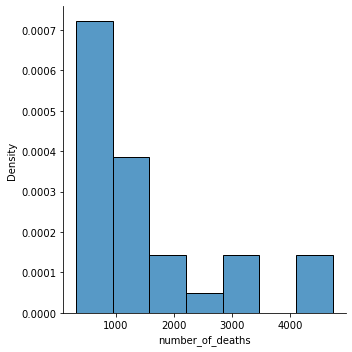

In [33]:
# Extract feature we're interested in
data_2= bah_disasters_df['number_of_deaths']

# Generate histogram/distribution plot
sb.displot(data_2, stat="density")

plt.show()

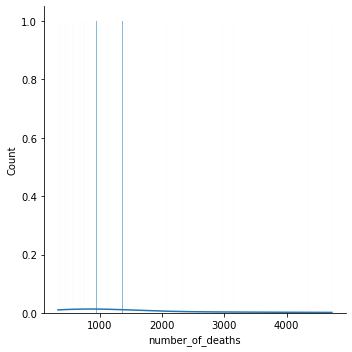

In [36]:
sb.displot(data_2, discrete = True, kde = True)
plt.show()

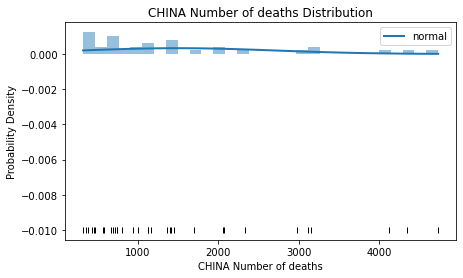

In [37]:
# Histogram
# ==============================================================================
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data_2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data_2), max(data_2), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data_2, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_2, np.full_like(data_2, -0.01), '|k', markeredgewidth=1)
ax.set_title('CHINA Number of deaths Distribution')
ax.set_xlabel('CHINA Number of deaths')
ax.set_ylabel('Probability Density')
ax.legend();

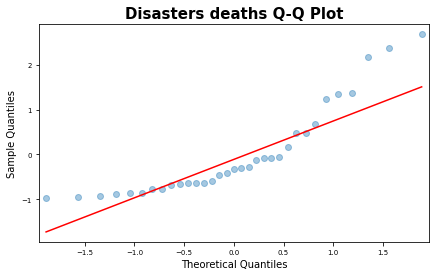

In [38]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data_2,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Disasters deaths Q-Q Plot', fontsize = 15,
             fontweight = "bold")
ax.tick_params(labelsize = 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x1f63ee272c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f63ee27c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f63ee21cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f63ee32248>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f63ee32948>],
 'means': []}

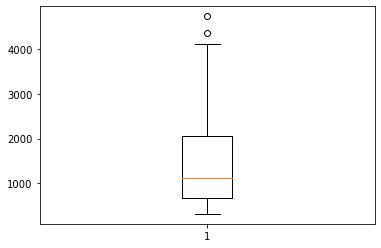

In [39]:
plt.boxplot(data_2)

In [40]:
print('Kursotis:', stats.kurtosis(data_1))
print('Skewness:', stats.skew(data_1))

Kursotis: 4.0454058251699925
Skewness: 2.123305415346158


In [41]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(data_1)
shapiro_test

ShapiroResult(statistic=0.6977896690368652, pvalue=6.045477221050533e-07)

In [42]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(data_1)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 27.439055363923913, p-value = 1.100740214759706e-06
